In [53]:
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.transform import Rotation as R

import matplotlib.pyplot as plt
import numpy as np

def rand(n, min, max):
    return (max - min) * np.random.rand(n) + min

In [54]:
rand(100, 1, 10)

array([7.99752338, 9.88215575, 7.76704364, 4.0413446 , 9.1561287 ,
       8.37706202, 4.71007177, 6.06944258, 7.90948964, 2.72353992,
       3.00803422, 8.14343007, 1.29098427, 5.20121583, 3.31632423,
       8.25031753, 8.41097623, 6.52627879, 5.09772651, 7.08018132,
       1.97156729, 8.2435106 , 6.33311758, 3.251092  , 3.95731318,
       4.00444067, 1.15244482, 3.88623109, 5.51310581, 5.59080788,
       8.44794077, 5.57753013, 9.21634233, 8.38064526, 5.79520375,
       4.20953249, 3.85511183, 2.89105448, 4.82634791, 8.62641276,
       2.63452964, 2.81193099, 8.59168938, 5.4393752 , 5.71671781,
       1.36400624, 2.69410642, 1.8662894 , 4.64466097, 3.09877464,
       8.4586356 , 2.88731387, 9.25846569, 5.96475227, 1.16443193,
       3.27582992, 4.34887679, 5.18771079, 2.95628897, 2.5846591 ,
       7.95901744, 3.34774526, 5.96021525, 3.61658991, 3.74889314,
       5.05648777, 8.20049763, 8.16120618, 2.8011215 , 7.56290782,
       3.40894318, 7.16637457, 6.63877706, 2.49673669, 3.63463

In [55]:
def random_vector_on_unit_sphere():
    theta = rand(1, 0, 2 * np.pi)[0]
    phi = np.arccos(1 - 2 * rand(1, 0, 1)[0])
    return [np.sin(phi) * np.cos(theta),
            np.sin(phi) * np.sin(theta),
            np.cos(phi)]

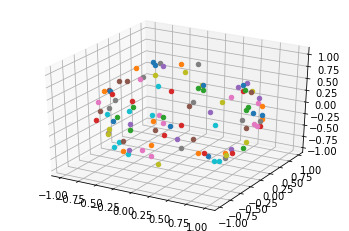

In [56]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d")

for i in range(100):
    ax1.scatter(*random_vector_on_unit_sphere())

In [57]:
def random_vector_on_hemisphere(normal):
    vec = random_vector_on_unit_sphere()
    if np.dot(vec, normal) < 0:
        return np.multiply(vec, -1)
    return vec

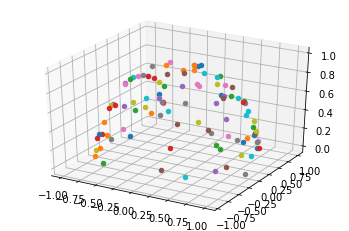

In [58]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection="3d")

for i in range(100):
    ax2.scatter(*random_vector_on_hemisphere([0, 0, 1]))

In [262]:
def random_vector_on_cone(normal, theta):
    normal = np.divide(normal, np.linalg.norm(normal))

    # generate a point on the spheres slice, with z = cos(theta)
    z = np.cos(theta * 2)

    phi = rand(1, 0, 2 * np.pi)[0]
    x = np.sqrt(1 - z * z) * np.cos(phi)
    y = np.sqrt(1 - z * z) * np.sin(phi)

    # rotate the point towards the north pole
    rotaxis = [np.sin(phi), -np.cos(phi), 0]

    # choose a random angle to rotate up by
    # it needs to be distributed so that more 
    # points dont end up near the north pole
    angle = 2 * theta * (1 - 2 * np.arccos(rand(1, 0, 1)[0]) / np.pi)
    rotaxis = np.multiply(rotaxis, angle)

    rotmatrix = R.from_rotvec(rotaxis).as_matrix()

    point = rotmatrix.dot([x, y, z])

    if normal[2] > 0.999999:
        return point
    
    if normal[2] < -0.999999:
        return np.multiply(point)

    # rotate the point towards the normal
    
    rotaxis2 = np.cross(normal, [0, 0, -1])
    rotaxis2 = np.divide(rotaxis2, np.linalg.norm(rotaxis2)) # normalize
    rotaxis2 = np.multiply(rotaxis2, np.arccos(normal[2]))

    rotmatrix2 = R.from_rotvec(rotaxis2).as_matrix()

    point = rotmatrix2.dot(point)

    return point


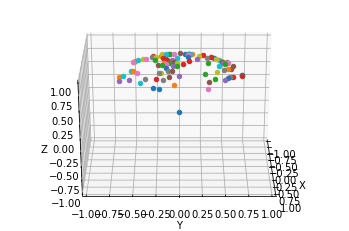

In [263]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection="3d")

ax3.view_init(elev=25, azim=0)

ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")

ax3.set_xlim(-1, 1)
ax3.set_ylim(-1, 1)
ax3.set_zlim(-1, 1)

ax3.scatter(0, 0, 0)

for i in range(100):
    ax3.scatter(*random_vector_on_cone([0, 0, 1], np.pi / 8))